# 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 서울 확진자 정보 불러오기
patient_path = '/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/PatientInfo.csv'
patient_data = pd.read_csv(patient_path)
patient_data

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [3]:
# 필요한 데이터 컬럼 정리
pa = patient_data[['sex', 'age', 'province', 'confirmed_date']]
pa


,sex,age,province,confirmed_date
0,male,50s,Seoul,2020-01-23
1,male,30s,Seoul,2020-01-30
2,male,50s,Seoul,2020-01-30
3,male,20s,Seoul,2020-01-30
4,female,20s,Seoul,2020-01-31
...,...,...,...,...
5160,female,30s,Jeju-do,2020-05-30
5161,NaN,NaN,Jeju-do,2020-06-16
5162,NaN,NaN,Jeju-do,2020-06-18
5163,NaN,NaN,Jeju-do,2020-06-18


In [4]:
# 지역을 서울로 정리해주고 province 컬럼 제거
pb = pa[pa['province']=='Seoul']
del pb['province']
pb

,sex,age,confirmed_date
0,male,50s,2020-01-23
1,male,30s,2020-01-30
2,male,50s,2020-01-30
3,male,20s,2020-01-30
4,female,20s,2020-01-31
...,...,...,...
1307,NaN,NaN,2020-06-29
1308,NaN,NaN,2020-06-29
1309,NaN,NaN,2020-06-29
1310,NaN,NaN,2020-06-29


In [5]:
# 결측치 확인
pb.isnull().sum()

sex               728
age               728
confirmed_date      0
dtype: int64

In [6]:
# 결측치 제거
pb.dropna(inplace=True)
pb

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,sex,age,confirmed_date
0,male,50s,2020-01-23
1,male,30s,2020-01-30
2,male,50s,2020-01-30
3,male,20s,2020-01-30
4,female,20s,2020-01-31
...,...,...,...
880,male,30s,2020-06-02
894,male,60s,2020-06-02
1197,male,80s,2020-06-19
1213,female,70s,2020-06-20


In [7]:
# 성별, 나이 인덱스로 넣고 확진 날짜 count하기
pb = pb.groupby(['age', 'sex']).count()
pb

confirmed_date
age sex                   
0s  female               5
    male                 3
10s female              14
    male                13
20s female              94
    male                71
30s female              42
    male                58
40s female              46
    male                40
50s female              67
    male                46
60s female              24
    male                23
70s female              16
    male                10
80s female               4
    male                 6
90s male                 2

In [8]:
# 인덱스 다시 열로 정렬
pb.reset_index(inplace=True, drop=False)
pb

,age,sex,confirmed_date
0,0s,female,5
1,0s,male,3
2,10s,female,14
3,10s,male,13
4,20s,female,94
5,20s,male,71
6,30s,female,42
7,30s,male,58
8,40s,female,46
9,40s,male,40


In [9]:
# 안쓰는 연령 제거
pb = pb[pb['age']!='0s']
pb = pb[pb['age']!='80s']
pb = pb[pb['age']!='90s']
pb = pb[pb['age']!='10s']
pb

,age,sex,confirmed_date
4,20s,female,94
5,20s,male,71
6,30s,female,42
7,30s,male,58
8,40s,female,46
9,40s,male,40
10,50s,female,67
11,50s,male,46
12,60s,female,24
13,60s,male,23


In [10]:
# 서울 유동인구 데이터 불러오기 및 바로 필요한 컬럼 데이터만 추출
s = '/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/SeoulFloating.csv'
ft = pd.read_csv(s)
ft = ft[['sex','birth_year','fp_num']]

# 컬럼 명 편하게 변경
ft = ft.rename(columns={'birth_year':'age'})
ft

,sex,age,fp_num
0,female,20,19140
1,male,20,19950
2,female,20,25450
3,male,20,27050
4,female,20,28880
...,...,...,...
1084795,female,40,27620
1084796,female,40,56560
1084797,female,50,38960
1084798,female,60,25420


In [11]:
# 성별, 나이 인덱스화 해서 유동인구 평균화
ft = ft.groupby(['age','sex']).mean()
fp =ft
fp

fp_num
age sex                 
20  female  30686.069912
    male    29510.497566
30  female  33154.557190
    male    33980.606416
40  female  33451.815155
    male    33524.952876
50  female  32490.283186
    male    30294.449447
60  female  21747.356195
    male    19249.624447
70  female  18011.777987
    male    13021.592478

In [12]:
# index 풀고 다시 열로 정렬
fp.reset_index(inplace=True, drop=False)
fp

,age,sex,fp_num
0,20,female,30686.069912
1,20,male,29510.497566
2,30,female,33154.557190
3,30,male,33980.606416
4,40,female,33451.815155
5,40,male,33524.952876
6,50,female,32490.283186
7,50,male,30294.449447
8,60,female,21747.356195
9,60,male,19249.624447


In [13]:
# 데이터 합치기 전 pb 데이터 컬럼 정리
del pb['age']
del pb['sex']
pb.reset_index(inplace=True, drop=False) # reset_index를 통해 공통된 컬럼 만들기
del pb['index']
pb.reset_index(inplace=True, drop=False)
pb

,index,confirmed_date
0,0,94
1,1,71
2,2,42
3,3,58
4,4,46
5,5,40
6,6,67
7,7,46
8,8,24
9,9,23


In [14]:
# 데이터 병합 전 fp 데이터 컬럼 정리
fp.reset_index(inplace=True, drop=False)
fp

,index,age,sex,fp_num
0,0,20,female,30686.069912
1,1,20,male,29510.497566
2,2,30,female,33154.557190
3,3,30,male,33980.606416
4,4,40,female,33451.815155
5,5,40,male,33524.952876
6,6,50,female,32490.283186
7,7,50,male,30294.449447
8,8,60,female,21747.356195
9,9,60,male,19249.624447


In [15]:
# fp, pb 데이터 병합
ff = pd.merge(fp, pb, on='index')
ff

,index,age,sex,fp_num,confirmed_date
0,0,20,female,30686.069912,94
1,1,20,male,29510.497566,71
2,2,30,female,33154.557190,42
3,3,30,male,33980.606416,58
4,4,40,female,33451.815155,46
5,5,40,male,33524.952876,40
6,6,50,female,32490.283186,67
7,7,50,male,30294.449447,46
8,8,60,female,21747.356195,24
9,9,60,male,19249.624447,23


In [16]:
## 성별과 나이를 동시에 확인할 수 있는 인덱스 지정
ff = ff.rename(index={0:'20-Female',1:'20-Male',2:'30-Female',3:'30-Male',4:'40-Female',
                                            5:'40-Male',6:'50-Female',7:'50-Male',8:'60-Female',
                                           9:'60-Male',10:'70-Female',11:'70-Male'})

# 불필요한 컬럼 정리
del ff['age']
del ff['sex']
del ff['index']
ff

,fp_num,confirmed_date
20-Female,30686.069912,94
20-Male,29510.497566,71
30-Female,33154.557190,42
30-Male,33980.606416,58
40-Female,33451.815155,46
40-Male,33524.952876,40
50-Female,32490.283186,67
50-Male,30294.449447,46
60-Female,21747.356195,24
60-Male,19249.624447,23


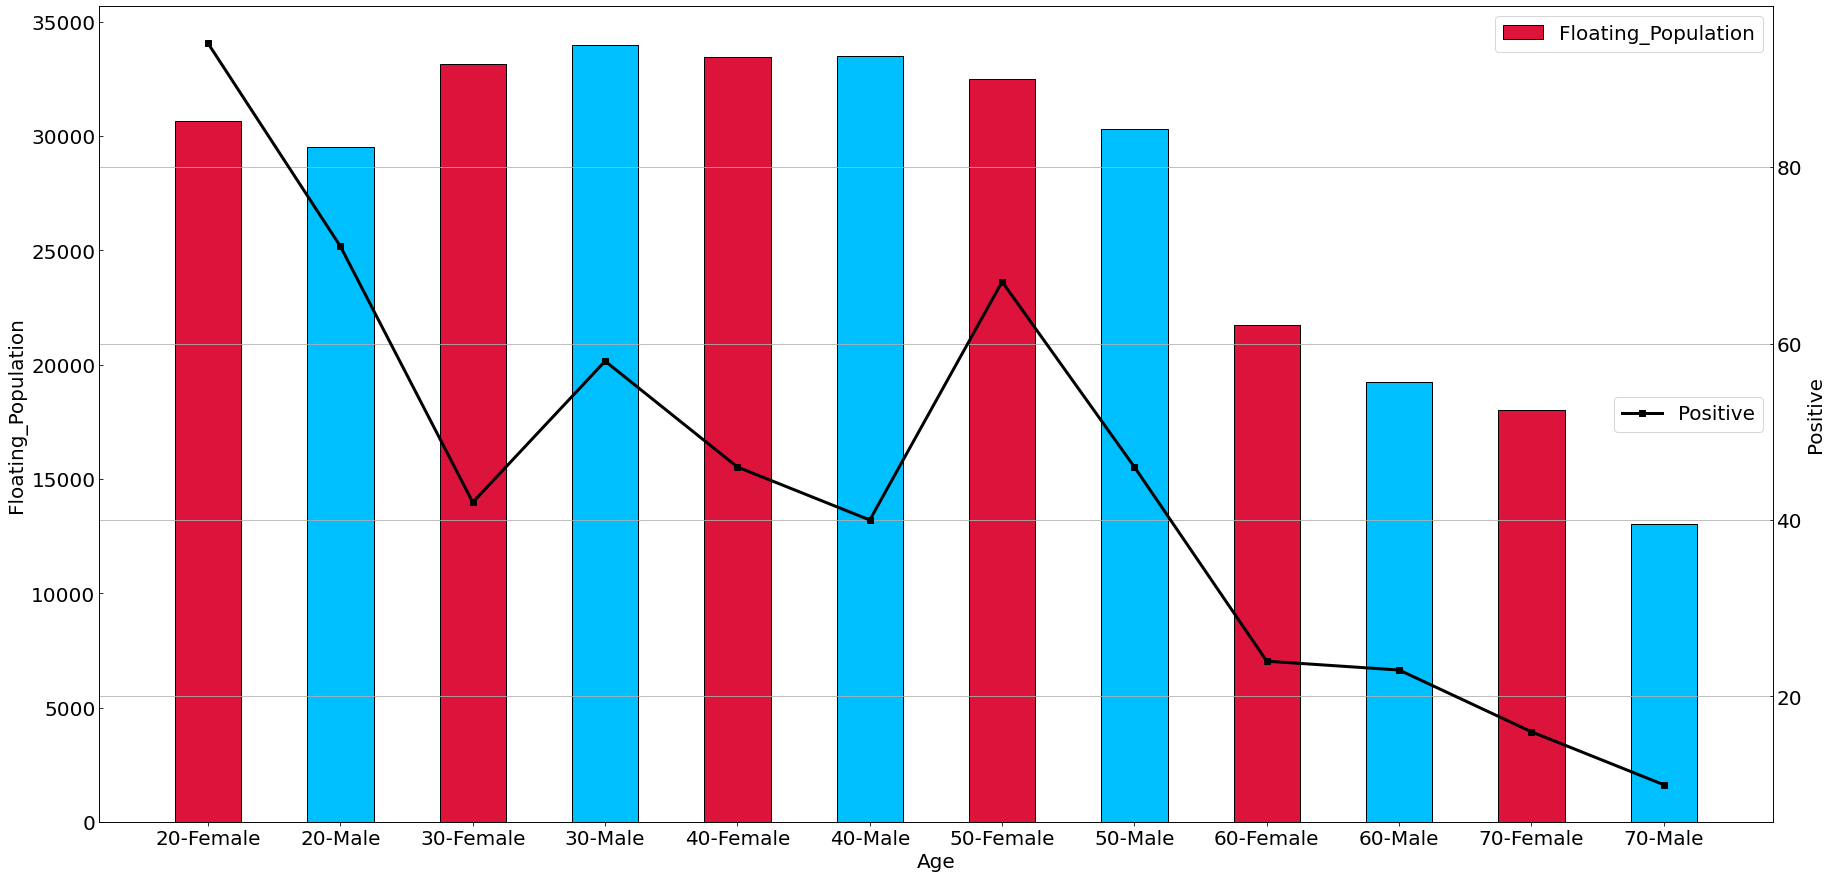

In [17]:
#연령별 성별 확진자수와 유동인구 상관관계 시각화 

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['font.size'] = 20

x = ff.index
y1 = ff['fp_num']
y2 = ff['confirmed_date']

fig, ax1 = plt.subplots() 
colors = ['crimson','deepskyblue'] 

ax1.bar(x, y1, color=colors, width=0.5,label='Floating_Population', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Floating_Population') 
ax1.tick_params(axis='y', direction='in') 
ax2 = ax1.twinx()
ax2.plot(x, y2, '-s', color='black',linewidth=3,label='Positive') 
ax2.set_ylabel('Positive')
ax2.tick_params(axis='both', direction='in') 
ax1.legend(loc='best')
ax2.legend(loc='right')
plt.grid() 
plt.show()